In [11]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline
import numpy as np
import pandas as pd

# 定义广西十四个城市的名称
guangxi_cities = ['南宁市', '柳州市', '桂林市', '梧州市', '北海市', '防城港市',
                  '钦州市', '贵港市', '玉林市', '百色市', '贺州市', '河池市', '来宾市', '崇左市']

# 生成日期范围
dates = pd.date_range(start='2023-01-01', end='2024-04-01')



# 生成示例数据（这里使用随机数）
np.random.seed(42)  # 设置随机种子以便重复实验
data = {date.strftime('%Y-%m-%d'): np.random.randint(50,
                                                     200, size=len(guangxi_cities)).tolist() for date in dates}

# 创建时间轴
tl = Timeline()

# 循环生成每一天的地图
for date in dates:
    date_str = date.strftime('%Y-%m-%d')
    values = data[date_str]
    map_min = int(np.min(values))
    map_max = int(np.max(values))
    guangxi_map = (
        Map()
        .add("", [list(z) for z in zip(guangxi_cities, values)], "广西")
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"广西壮族自治区 - {date_str}"),
            visualmap_opts=opts.VisualMapOpts(
                type_='color', min_=map_min, max_=map_max
            )
        )
    )
    tl.add(guangxi_map, date_str)

# 设置自动播放
tl.add_schema(is_auto_play=True, play_interval=1000)

# 渲染在 notebook 中
tl.render_notebook()

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline
import numpy as np
import pandas as pd
import glob
import os

# 定义广西十四个城市的名称和文件路径
guangxi_cities = ['南宁市', '柳州市', '桂林市', '梧州市', '北海市', '防城港市',
                  '钦州市', '贵港市', '玉林市', '百色市', '贺州市', '河池市', '来宾市', '崇左市']
city_folders = ['nanning', 'liuzhou', 'guilin', 'wuzhou', 'beihai', 'fangchenggang',
                'qinzhou', 'guigang', 'yulin', 'baise', 'hezhou', 'hechi', 'laibin', 'chongzuo']
base_path = "exp"  # 替换为你的实际路径

# 合并所有CSV文件的数据
all_data = pd.DataFrame()
for city, folder in zip(guangxi_cities, city_folders):
    file_path = os.path.join(base_path, folder, f'pred_{folder}.csv')
    city_data = pd.read_csv(
        file_path, usecols=['DATE', 'potential_solar_power'])
    city_data['DATE'] = pd.to_datetime(
        city_data['DATE'])  # 将DATE列转换为datetime类型
    city_data.set_index('DATE', inplace=True)
    city_data.columns = [city]  # 重命名列为城市名
    if all_data.empty:
        all_data = city_data
    else:
        all_data = all_data.join(city_data, how='outer')

# 填充缺失值
all_data.fillna(0, inplace=True)

# 创建时间轴
tl = Timeline()

# 循环生成每一天的地图
for date in all_data.index:
    date_str = date.strftime('%Y-%m-%d')
    values = all_data.loc[date].tolist()
    map_min = int(np.min(values))
    map_max = int(np.max(values))
    guangxi_map = (
        Map()
        .add("", [list(z) for z in zip(guangxi_cities, values)], "广西")
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"广西壮族自治区 - {date_str}"),
            visualmap_opts=opts.VisualMapOpts(
                type_='color',
                min_=map_min,
                max_=map_max,
            )
        )
    )
    tl.add(guangxi_map, date_str)

# 设置自动播放
tl.add_schema(is_auto_play=True, play_interval=1000)

# 渲染在 notebook 中
tl.render_notebook()

In [13]:
# city_folders = ['nanning', 'liuzhou', 'guilin', 'wuzhou', 'beihai', 'fangchenggang',
#                 'qinzhou', 'guigang', 'yulin', 'baise', 'hezhou', 'hechi', 'laibin', 'chongzuo']
# base_path = "exp"  # 替换为你的实际路径

# # 合并所有CSV文件的数据
# all_data = pd.DataFrame()
# for folder in city_folders:
#     file_path = os.path.join(base_path, folder, f'pred_{folder}.csv')
#     city_data = pd.read_csv(
#         file_path, usecols=['DATE', 'potential_solar_power'])
#     city_data['DATE'] = pd.to_datetime(
#         city_data['DATE'])  # 将DATE列转换为datetime类型
#     city_data.set_index('DATE', inplace=True)
       

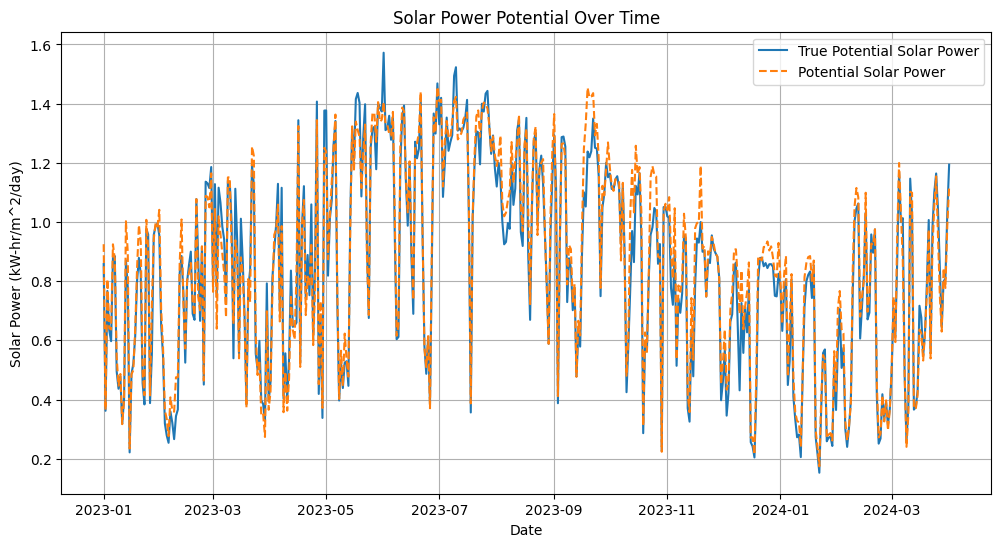

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('exp/nanning/pred_nanning.csv', usecols=[
                 'DATE', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'potential_solar_power'])

# 将DATE列转换为datetime类型
df['DATE'] = pd.to_datetime(df['DATE'])

# 定义计算太阳能发电潜力的函数


def calculate_solar_power_potential(SW_DWN, SW_DIFF, beta, Rb, rho_g, eff):
    part1 = SW_DWN * Rb
    part2 = SW_DIFF * (1 + np.cos(np.radians(beta))) / 2
    part3 = SW_DWN * rho_g * (1 - np.cos(np.radians(beta))) / 2

    Solar_power_potential = (part1 + part2 + part3) * eff
    return Solar_power_potential


# 计算并存储太阳能发电潜力
df['true_potential_solar_power'] = calculate_solar_power_potential(
    df['ALLSKY_SFC_SW_DWN'], df['ALLSKY_SFC_SW_DIFF'], beta=30, Rb=0.8, rho_g=0.2, eff=0.18)

# 设置DATE列为索引
df.set_index('DATE', inplace=True)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['true_potential_solar_power'],
         label='True Potential Solar Power')
plt.plot(df.index, df['potential_solar_power'],
         label='Potential Solar Power', linestyle='--')

# 设置图表标题和标签
plt.title('Solar Power Potential Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Power (kW-hr/m^2/day)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()